# D208 Task 2 Performance Assessment (Logistic Regression)

- Vincent Taylor

## Part 1: Research Question

- (A1): The research question that I will be analyzing is what factors  contribute most to customer churn? This research question is similar to my D206 project but I believe that delving deeper into this specific question would create value for our organization. The benefits associated with this analysis are as follows; being able to indentify key independent variables that contribute to customer churn will allow for the creation of strategies that can be implemented in order to mitigate the amount of customers choosing to churn. This can lead to a direct cost savings by not having to focus as heavily on marketing to new customers. Another benefit associated for the company would be the competitve advantage that is created by using data in order to inform insights. 

---

## Goals of Analysis
- (A2): The primary goal of this analysis is to identify the variables in the churn dataset that can provide us insight on when a customer is likely to churn. This dataset is perfect for this analysis based on the amount of predictor variables I believe could help us identify when a customer is likely to churn.
---

## Part II Method Justification

#### Assumptions of the logistic regression model
-The four assumptions of the logistic regression model. The first one and arguably the most important is that they response variable has to be binary based on this assumption our response variable `churn` meets that requirement with it's two possible outcomes being (yes/no). Next the model assumes that the observations that make up our dataset are independent, we will check for this in our visualization portion by creating a residual plot to make sure that there is a random pattern for our observations we select. Moreover, the variables that we select we have to make sure that there is no multicollinearity between our explanatory variables, similar to task1 I will use variance inflation factor in order to verify that there is no multicollinearity among the explanatory variables. We also want to make sure that we check for outliers in the cleaning process and if needed replace the values with measures of central tendency. ***Logistic regression also assumes linearity of independent variables and log odds, it requires the independent variables to have a linear relationship to the log odds.*** Lastly we would want to make sure that the sample size is large enough as well, for this analysis I will be using 10 variables to make sure that our sample size is large enough.

---

#### Benefits of using Python in support of the analysis
- (B2) I chose to use Python to perform this analysis due to its ability to handle data analysis as well as it's ease of use when it comes to visualizing and performing statitsitcal modeling. Importing libraries like Numpy makes it easier to perform mathematical operations on larger arrays.Pandas makes it easier to handle data manipulation and analysis more efficiently.Matplotlib and Seaborn are helpful and make data visualizations easier. Scipy makes it super easy to perform statistical calculations and helps with checking for multicollinearity to ensure the model is as accurate as possible.Lastly Scikit learn is helpful when trying to build machine learning models while also helping with multicollinearity which further strengthens the reliability of the model.


In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Disabling warinings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# import data from csv
df = pd.read_csv('churn_clean.csv', index_col=0)
df.head()

,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,...,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
CaseOrder,,,,,,,,,,,,,,,,,,,,,
1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,38,...,172.455519,904.536110,5,5,5,3,4,4,3,4
2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,10446,...,242.632554,800.982766,3,4,3,3,4,3,4,4
3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,3735,...,159.947583,2054.706961,4,4,2,4,4,3,3,3
4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,13863,...,119.956840,2164.579412,4,4,4,2,5,4,3,3
5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,11352,...,149.948316,271.493436,4,4,4,3,4,4,4,5


#### Why logistic regression is an appropriate technique for this analysis.
(B3) Logistic regression is an appropriate technique for this analysis due to our dependent variable `churn` only having two outcomes those being (yes/no). Logistic regression also assumes that the variables are independent of each other, similar to multiple linear regression but since our dependent variables is binary it is not suitable. Logistic regression would not be appropriate if we were using a continous variable such as `tenure` that we used in the task 1 PA due to its continous outcome. Logistic regression also would not work if there was multicollinearity amongst the selected variables or if the relationship or outcome was non-linear.

#### Part III

(C1) Data Cleaning Goals
My goals for the data cleaning process is to; fix improperly formatted values, checking for duplicates, null values and outliers. I will encode categorical variables, and then add the most relevant ones to the analysis. I plan to reduce the variables in the dataframe itself as there are certain variables that I believe will not be necessary for the analysis. Moreover I will check for multicollinearity among the independent variables and remove them from the analysis.

#### Variables used in the analysis
The dependent variable or y used in this analysis will be `churn` and I will start with all of the categorical variables and narrow our selection based on statistical significance to our y with p-values less than our alpha of 0.15. I changed the alpha for this assignment in order to encompass one continous variable `email` to meet the rubric requirements. The independent variables I selected for this analysis were; `techie`,`port_modem`,`tablet`,`phone`,`multiple_lines`,`online_security`,`online_backup`,`device_protection`,`tech_support`,`streaming_tv`,`streaming_movies`,`paperless_billing`,`internet_service_DSL`, and `internet_service_Fiber Optic`

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Customer_id           10000 non-null  object 
 1   Interaction           10000 non-null  object 
 2   UID                   10000 non-null  object 
 3   City                  10000 non-null  object 
 4   State                 10000 non-null  object 
 5   County                10000 non-null  object 
 6   Zip                   10000 non-null  int64  
 7   Lat                   10000 non-null  float64
 8   Lng                   10000 non-null  float64
 9   Population            10000 non-null  int64  
 10  Area                  10000 non-null  object 
 11  TimeZone              10000 non-null  object 
 12  Job                   10000 non-null  object 
 13  Children              10000 non-null  int64  
 14  Age                   10000 non-null  int64  
 15  Income             

Using `.info` in order to get count for variables and the associated datatypes.

In [4]:
df.shape

(10000, 49)

In [5]:
if df.isnull().sum().sum() == 0:
    print("No null values.")
else:
    print("Null values exist!")

No null values.


In [6]:
# Cleaning the CSV file

#renaming columns to python casing.
col_head = {
    'CaseOrder': 'case_order',
    'Customer_id': 'customer_id',
    'Interaction': 'interaction',
    'City': 'city',
    'State': 'state',
    'County': 'county',
    'Zip': 'zip',
    'Lat': 'lat',
    'Lng': 'lng',
    'Population': 'population',  
    'Area': 'area',  
    'Job': 'job',
    'Children': 'children',
    'Age': 'age', 
    'Income': 'income',  
    'Marital': 'marital_type',
    'Gender': 'gender',
    'Churn': 'churn',
    'Outage_sec_perweek': 'outage_sec_perweek',
    'Email': 'email',
    'Contacts': 'contacts',
    'Yearly_equip_failure': 'yearly_equip_failure',
    'Techie': 'techie',
    'Contract': 'contract',
    'Port_modem': 'port_modem',
    'Tablet': 'tablet',
    'InternetService': 'internet_service',
    'Phone': 'phone',
    'Multiple': 'multiple_lines',
    'OnlineSecurity': 'online_security',
    'OnlineBackup': 'online_backup',
    'DeviceProtection': 'device_protection',
    'TechSupport': 'tech_support',
    'StreamingTV': 'streaming_tv',
    'StreamingMovies': 'streaming_movies',
    'PaperlessBilling': 'paperless_billing',
    'PaymentMethod': 'payment_method',
    'Tenure': 'tenure',
    'MonthlyCharge': 'monthly_charge',
    'Bandwidth_GB_Year': 'bandwidth_gb_year',
    'Item1': 'timely_response',
    'Item2': 'timely_fixes',
    'Item3': 'timely_replacements',
    'Item4': 'reliability',
    'Item5': 'options',
    'Item6': 'respectful_response',
    'Item7': 'courteous_exchange',
    'Item8': 'active_listening'}
df.rename(columns=col_head, inplace=True)

#Reexpressing the values of payment method to be more concise.
dict_pay = {"payment_method": {
     "Credit Card (automatic)": "Autopay",
     "Bank Transfer(automatic)": "Autopay",
     "Electronic Check": "eCheck",
     "Mailed Check": "Check",
}}
df.replace(dict_pay, inplace = True)

# dropping columns not relevant to analysis
df = df.drop(columns=['customer_id', 'interaction', 'UID',
                      'city', 'state', 'county','TimeZone', 
                      'job','zip',
                      'lat', 'lng','population'])

In [7]:
#dropping num_col values keeping email in order to meet the one continous variable requirement.
df.drop(['children', 'area','gender','payment_method','age', 'income', 'outage_sec_perweek', 'contacts',
       'yearly_equip_failure', 'tenure', 'monthly_charge', 'bandwidth_gb_year',
       'timely_response', 'timely_fixes', 'timely_replacements', 'reliability',
       'options', 'respectful_response', 'courteous_exchange',
       'active_listening','marital_type'], axis = 1, inplace = True)

In [8]:
#Creating categorical column
cat_col = df.select_dtypes(exclude = ['int', 'float'])

#Creating numerical column
num_col = df.select_dtypes(exclude = ['object'])

In [9]:
#printing column for cat_col
print(cat_col.columns)

Index(['churn', 'techie', 'contract', 'port_modem', 'tablet',
       'internet_service', 'phone', 'multiple_lines', 'online_security',
       'online_backup', 'device_protection', 'tech_support', 'streaming_tv',
       'streaming_movies', 'paperless_billing'],
      dtype='object')


In [10]:
#printing column for num_col
print(num_col.columns)

Index(['email'], dtype='object')


#### Summary Statistics (C2)

In [11]:
cat_col.describe()

,churn,techie,contract,port_modem,tablet,internet_service,phone,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing
count,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000
unique,2,2,3,2,2,3,2,2,2,2,2,2,2,2,2
top,No,No,Month-to-month,No,No,Fiber Optic,Yes,No,No,No,No,No,No,No,Yes
freq,7350,8321,5456,5166,7009,4408,9067,5392,6424,5494,5614,6250,5071,5110,5882


In [12]:
#sumamries for each variable
for column in df.columns:
    most_frequent = df[column].mode().values[0]
    frequency = df[column].value_counts()[most_frequent]
    unique_values = df[column].unique()
    
    print(f"Column '{column}':")
    print(f"  Most frequent value: '{most_frequent}' (Appears {frequency} times)")
    print(f"  Unique values: {unique_values}")

Column 'churn':
  Most frequent value: 'No' (Appears 7350 times)
  Unique values: ['No' 'Yes']
Column 'email':
  Most frequent value: '12' (Appears 1310 times)
  Unique values: [10 12  9 15 16 20 18 17 14 13 11  8  6  5 19  3  7 21  4  2  1 23 22]
Column 'techie':
  Most frequent value: 'No' (Appears 8321 times)
  Unique values: ['No' 'Yes']
Column 'contract':
  Most frequent value: 'Month-to-month' (Appears 5456 times)
  Unique values: ['One year' 'Month-to-month' 'Two Year']
Column 'port_modem':
  Most frequent value: 'No' (Appears 5166 times)
  Unique values: ['Yes' 'No']
Column 'tablet':
  Most frequent value: 'No' (Appears 7009 times)
  Unique values: ['Yes' 'No']
Column 'internet_service':
  Most frequent value: 'Fiber Optic' (Appears 4408 times)
  Unique values: ['Fiber Optic' 'DSL' 'None']
Column 'phone':
  Most frequent value: 'Yes' (Appears 9067 times)
  Unique values: ['Yes' 'No']
Column 'multiple_lines':
  Most frequent value: 'No' (Appears 5392 times)
  Unique values: ['No

Used `.value_counts` in order to generate summary counts on each variable contained in the inital data set, just to see the full count of unique values as well as what the most frequent value is in each column.

In [13]:
# Converting yes/no columns to 1/0
yes_no_col = ['churn', 'techie', 'port_modem', 'tablet', 'phone', 'multiple_lines', 'online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies', 'paperless_billing']
df[yes_no_col] = df[yes_no_col].replace({'Yes': 1, 'No': 0})

In [14]:
#Creating dictionary for unique values and total count for each variable in dataset.
unique_count = {}

for column in df.columns:
    unique_value = df[column].unique()
    counts = df[column].value_counts()
    unique_count[column] = (unique_value, counts)

#### Updating non binary categorical columns

In [15]:
df = pd.get_dummies(df, columns=['internet_service','contract'])

In [16]:
# dropping none columns
df.drop(['internet_service_None'], axis=1, inplace = True)

In [17]:
df.shape

(10000, 19)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   churn                         10000 non-null  int64
 1   email                         10000 non-null  int64
 2   techie                        10000 non-null  int64
 3   port_modem                    10000 non-null  int64
 4   tablet                        10000 non-null  int64
 5   phone                         10000 non-null  int64
 6   multiple_lines                10000 non-null  int64
 7   online_security               10000 non-null  int64
 8   online_backup                 10000 non-null  int64
 9   device_protection             10000 non-null  int64
 10  tech_support                  10000 non-null  int64
 11  streaming_tv                  10000 non-null  int64
 12  streaming_movies              10000 non-null  int64
 13  paperless_billing             1

In [19]:
df['email'].describe()

count    10000.000000
mean        12.016000
std          3.025898
min          1.000000
25%         10.000000
50%         12.000000
75%         14.000000
max         23.000000
Name: email, dtype: float64

In [20]:
mean_charge = df.groupby('churn')['email'].mean()
print(mean_charge)

churn
0    11.993605
1    12.078113
Name: email, dtype: float64


Based on this our customers who decide to `churn` recieve more emails than customers who dont churn. 

In [21]:
df.describe()

,churn,email,techie,port_modem,tablet,phone,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,internet_service_DSL,internet_service_Fiber Optic,contract_Month-to-month,contract_One year,contract_Two Year
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.265000,12.016000,0.167900,0.483400,0.299100,0.906700,0.460800,0.357600,0.450600,0.438600,0.375000,0.492900,0.489000,0.588200,0.346300,0.440800,0.545600,0.210200,0.244200
std,0.441355,3.025898,0.373796,0.499749,0.457887,0.290867,0.498486,0.479317,0.497579,0.496241,0.484147,0.499975,0.499904,0.492184,0.475814,0.496508,0.497941,0.407471,0.429633
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,10.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,12.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,14.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
max,1.000000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [22]:
df.groupby('churn').mean()

,email,techie,port_modem,tablet,phone,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,internet_service_DSL,internet_service_Fiber Optic,contract_Month-to-month,contract_One year,contract_Two Year
churn,,,,,,,,,,,,,,,,,,
0,11.993605,0.152925,0.480952,0.299864,0.911293,0.421361,0.361497,0.435510,0.421769,0.369524,0.423810,0.402177,0.586122,0.319592,0.458231,0.465578,0.244218,0.290204
1,12.078113,0.209434,0.490189,0.296981,0.893962,0.570189,0.346792,0.492453,0.485283,0.390189,0.684528,0.729811,0.593962,0.420377,0.392453,0.767547,0.115849,0.116604


In [23]:
df_churn_yes = df[df['churn'] == 1]
df_churn_yes.describe()

,churn,email,techie,port_modem,tablet,phone,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,internet_service_DSL,internet_service_Fiber Optic,contract_Month-to-month,contract_One year,contract_Two Year
count,2650.0,2650.000000,2650.000000,2650.000000,2650.000000,2650.000000,2650.000000,2650.000000,2650.000000,2650.000000,2650.000000,2650.000000,2650.000000,2650.000000,2650.000000,2650.000000,2650.000000,2650.000000,2650.000000
mean,1.0,12.078113,0.209434,0.490189,0.296981,0.893962,0.570189,0.346792,0.492453,0.485283,0.390189,0.684528,0.729811,0.593962,0.420377,0.392453,0.767547,0.115849,0.116604
std,0.0,3.008534,0.406981,0.499998,0.457014,0.307944,0.495142,0.476039,0.500037,0.499878,0.487885,0.464791,0.444141,0.491184,0.493713,0.488389,0.422476,0.320104,0.321008
min,1.0,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.0,10.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,1.0,12.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1.0,14.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
max,1.0,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [24]:
df_churn_no = df[df['churn'] == 0]
df_churn_no.describe()

,churn,email,techie,port_modem,tablet,phone,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,internet_service_DSL,internet_service_Fiber Optic,contract_Month-to-month,contract_One year,contract_Two Year
count,7350.0,7350.000000,7350.000000,7350.000000,7350.000000,7350.000000,7350.000000,7350.000000,7350.000000,7350.000000,7350.000000,7350.000000,7350.000000,7350.000000,7350.000000,7350.000000,7350.000000,7350.000000,7350.000000
mean,0.0,11.993605,0.152925,0.480952,0.299864,0.911293,0.421361,0.361497,0.435510,0.421769,0.369524,0.423810,0.402177,0.586122,0.319592,0.458231,0.465578,0.244218,0.290204
std,0.0,3.032026,0.359940,0.499671,0.458229,0.284340,0.493811,0.480467,0.495857,0.493876,0.482709,0.494195,0.490371,0.492561,0.466350,0.498286,0.498848,0.429652,0.453887
min,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,10.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.0,12.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.0,14.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,0.0,22.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Correlation Matrix

In [25]:
df.corr().abs().sort_values(by='churn', ascending=False)

,churn,email,techie,port_modem,tablet,phone,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,internet_service_DSL,internet_service_Fiber Optic,contract_Month-to-month,contract_One year,contract_Two Year
churn,1.000000,0.012326,0.066722,0.008157,0.002779,0.026297,0.131771,0.013540,0.050508,0.056489,0.018838,0.230151,0.289262,0.007030,0.093487,0.058472,0.267653,0.139043,0.178337
streaming_movies,0.289262,0.000711,0.004298,0.005674,0.020710,0.002588,0.004691,0.010575,0.001434,0.019450,0.013533,0.010516,1.000000,0.000692,0.000249,0.002211,0.007640,0.001904,0.007049
contract_Month-to-month,0.267653,0.007547,0.001041,0.008267,0.011795,0.011708,0.020599,0.014693,0.005056,0.001215,0.003734,0.019789,0.007640,0.006211,0.004817,0.005661,1.000000,0.565296,0.622856
streaming_tv,0.230151,0.005099,0.003436,0.000272,0.018233,0.012464,0.003097,0.001415,0.008043,0.002878,0.003047,1.000000,0.010516,0.016353,0.002979,0.005118,0.019789,0.022054,0.002020
contract_Two Year,0.178337,0.004072,0.006235,0.001648,0.003255,0.001471,0.009212,0.017357,0.004381,0.005658,0.003726,0.002020,0.007049,0.021101,0.002610,0.007298,0.622856,0.293243,1.000000
contract_One year,0.139043,0.013516,0.005302,0.011840,0.017845,0.012756,0.015460,0.000346,0.001559,0.007450,0.000634,0.022054,0.001904,0.014659,0.003135,0.014613,0.565296,1.000000,0.293243
multiple_lines,0.131771,0.002966,0.004661,0.003014,0.019828,0.003398,1.000000,0.002436,0.002566,0.003207,0.010360,0.003097,0.004691,0.004657,0.010225,0.009210,0.020599,0.015460,0.009212
internet_service_DSL,0.093487,0.001904,0.002565,0.003371,0.001018,0.000071,0.010225,0.000715,0.000181,0.009688,0.023172,0.002979,0.000249,0.017909,1.000000,0.646211,0.004817,0.003135,0.002610
techie,0.066722,0.014047,1.000000,0.014256,0.010992,0.003081,0.004661,0.015300,0.004540,0.021346,0.007391,0.003436,0.004298,0.001311,0.002565,0.002100,0.001041,0.005302,0.006235
internet_service_Fiber Optic,0.058472,0.002827,0.002100,0.003294,0.005469,0.008126,0.009210,0.014582,0.001925,0.006759,0.026211,0.005118,0.002211,0.017686,0.646211,1.000000,0.005661,0.014613,0.007298


I decided to use the `.corr` function in order to identify indpendent variables that show a strong linear relationship with our y variable `churn`. I used the correlation coefficient of 0.01 to select variables that would be used in the inital logistic regression model. Please note that I am using the `.abs()` function to show the correlation coefficients for all variables. From the inital correlation matrix it looks like `streaming_movies`(29%) and `contract_Month-to-month`(27%) are showing the most potential as features to use for this analysis. I will next check for multicollinearity against the independent variables in order to narrow the selection using variance_inflation_factor from the statsmodel library.

In [26]:
# Checking for multicollinearity
vif_df = pd.DataFrame()
vif_df['feature'] = df.columns

vif_df['VIF'] = [variance_inflation_factor(df.values, i) 
                  for i in range(len(df.columns))]
print(vif_df)

                         feature        VIF
0                          churn   1.331214
1                          email   1.002303
2                         techie   1.007219
3                     port_modem   1.000732
4                         tablet   1.003005
5                          phone   1.002614
6                 multiple_lines   1.025824
7                online_security   1.002429
8                  online_backup   1.003956
9              device_protection   1.005578
10                  tech_support   1.002570
11                  streaming_tv   1.076983
12              streaming_movies   1.112368
13             paperless_billing   1.002350
14          internet_service_DSL   1.729994
15  internet_service_Fiber Optic   1.719815
16       contract_Month-to-month  21.802024
17             contract_One year   9.095361
18             contract_Two Year  10.491622


***VIF Results***

Based on the VIF results we can see high collinearity between the `contract_Month-to-month` and  contract_Two Year variables. these variables will be removed from our inital model due to their VIF scores being higher than our threshold of ten.

***Inital model independent variables***

The independent variables I will use for the inital model are; `techie`,`port_modem`,`tablet`,`phone`,`multiple_lines`,`online_security`,`online_backup`,`device_protection`,`tech_support`,`streaming_tv`,`streaming_movies`,`paperless_billing`,`internet_service_DSL`,`email`, and `internet_service_Fiber Optic`. After the inital model is evaluated I will remove variables using backwards stepwise elimination until all variables have p-values less than the adjusted alpha of 0.15.

In [27]:
df.drop(['contract_Two Year','contract_Month-to-month'], axis = 1, inplace = True)

In [28]:
# re-checking for multicollinearity
vif_df = pd.DataFrame()
vif_df['feature'] = df.columns

vif_df['VIF'] = [variance_inflation_factor(df.values, i) 
                  for i in range(len(df.columns))]
print(vif_df)

                         feature       VIF
0                          churn  1.690746
1                          email  9.931778
2                         techie  1.202385
3                     port_modem  1.896735
4                         tablet  1.419418
5                          phone  7.971891
6                 multiple_lines  1.857435
7                online_security  1.537006
8                  online_backup  1.785448
9              device_protection  1.752419
10                  tech_support  1.582264
11                  streaming_tv  2.055051
12              streaming_movies  2.115124
13             paperless_billing  2.334202
14          internet_service_DSL  2.446896
15  internet_service_Fiber Optic  2.829575
16             contract_One year  1.294072


In [29]:
#Showing transformed variables
df.head()

,churn,email,techie,port_modem,tablet,phone,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,internet_service_DSL,internet_service_Fiber Optic,contract_One year
CaseOrder,,,,,,,,,,,,,,,,,
1,0,10,0,1,1,1,0,1,1,0,0,0,1,1,0,1,1
2,1,12,1,0,1,1,1,1,0,0,0,1,1,1,0,1,0
3,0,9,1,1,0,1,1,0,0,0,0,0,1,1,1,0,0
4,0,15,1,0,0,1,0,1,0,0,0,1,0,1,1,0,0
5,1,16,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0


#### Visualizations (C3)

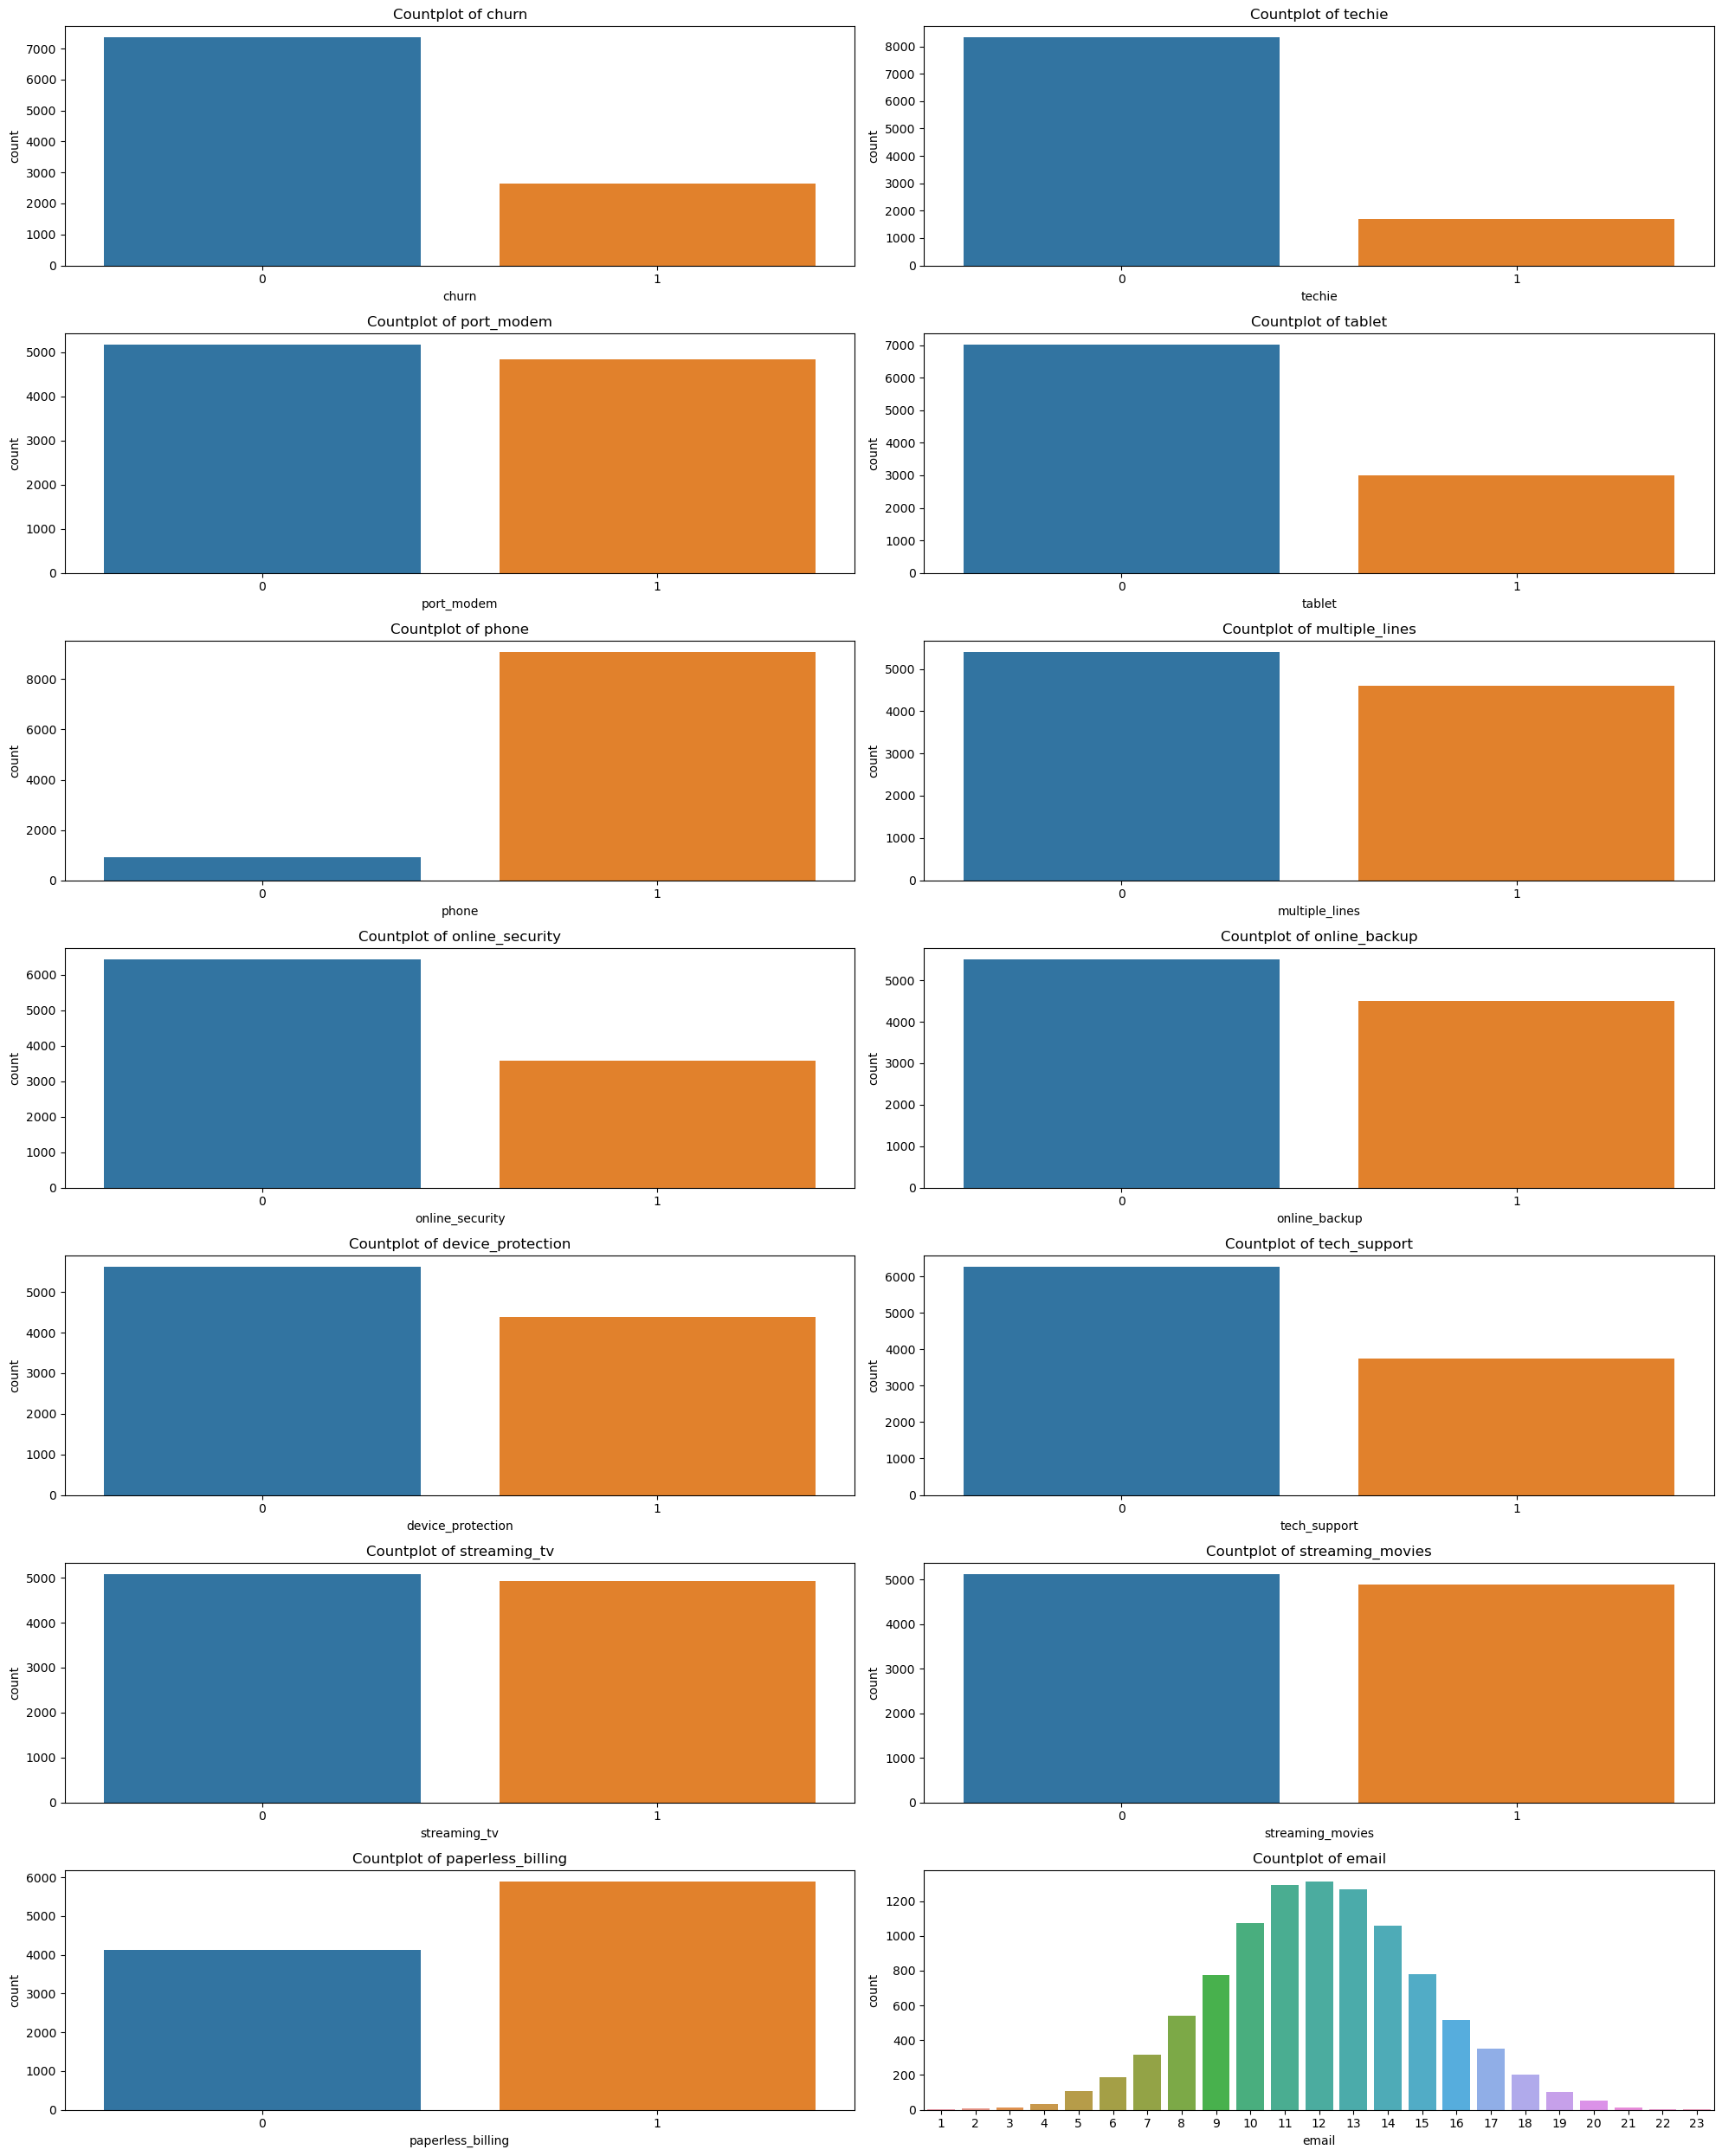

In [30]:
# Univariate Visualizations

Univar = ['churn', 'techie','port_modem', 'tablet', 'phone', 'multiple_lines',
       'online_security', 'online_backup', 'device_protection', 'tech_support',
       'streaming_tv', 'streaming_movies', 'paperless_billing','email']

# Univariate histogram visualizations of categorical variables
fig, axes = plt.subplots(7, 2, figsize=(20, 25))

for col, ax in zip(Univar, axes.flat):
    sns.countplot(data=df, x=col, ax=ax)
    ax.set_title(f'Countplot of {col}')
    
plt.tight_layout()


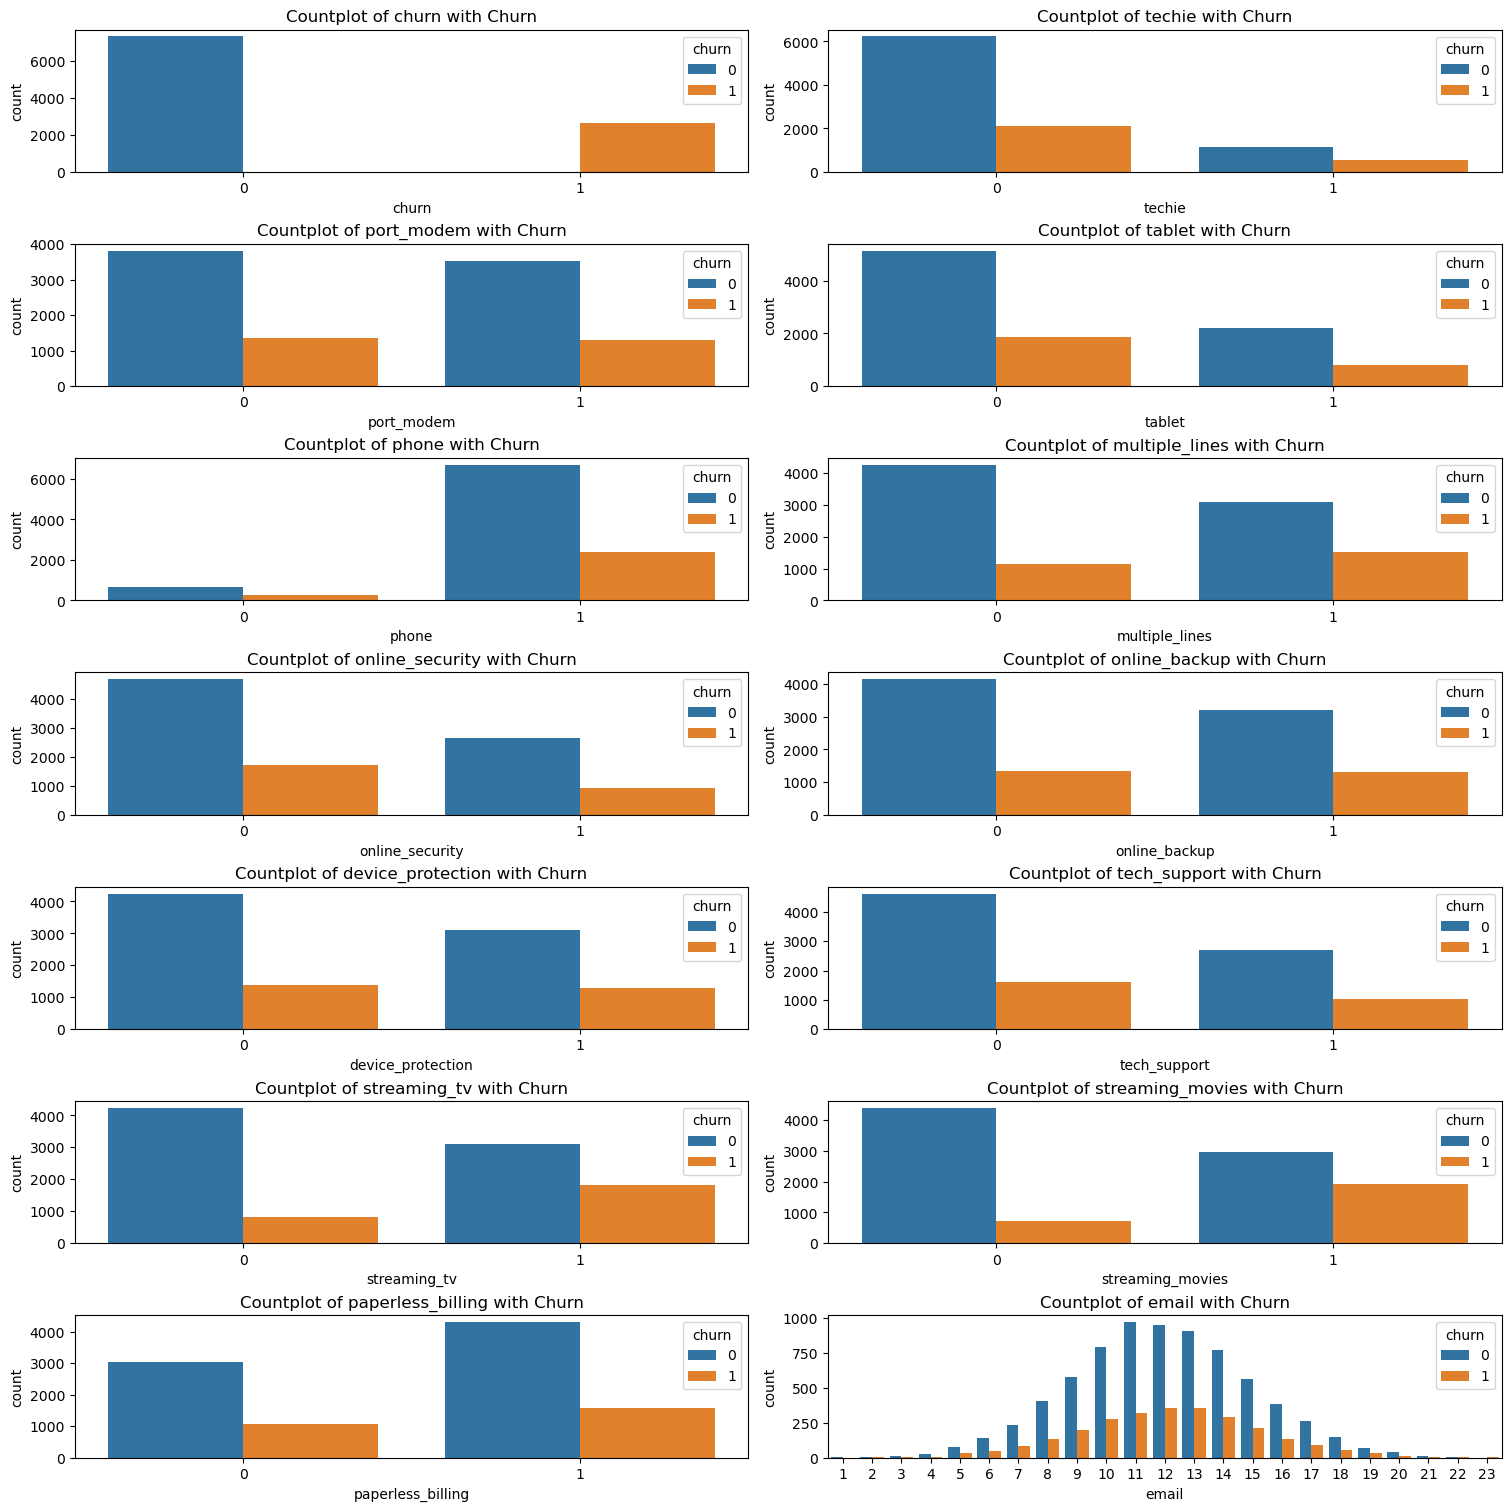

In [31]:
# Bivariate visualizations 
Bivar = ['churn','techie','port_modem', 'tablet', 'phone', 'multiple_lines',
       'online_security', 'online_backup', 'device_protection', 'tech_support',
       'streaming_tv', 'streaming_movies', 'paperless_billing','email']

# Bivariate countplot using churn as the dependent variable
fig, axes = plt.subplots(7, 2, figsize=(15, 15), constrained_layout=True)

for col, ax in zip(Bivar, axes.flat):
    sns.countplot(x=df[col], hue=df['churn'], ax=ax)
    ax.set_title(f'Countplot of {col} with Churn')


(C4) **Describe Data Transformation Goals**

We loaded in the churn dataset, then after exploring each column I created seperate lists for categorical variables and quantitative variables. Once the lists were in place I dropped the numerical columns list and started changing the binary yes/no categorical variables to 1/0 respectively. I then used the label encoding for feature for the remaining variables that were not yes no. I did not need to scale the variables due to all of them being changed to the same 1/0 value. After that was completed I printed a list of all the variables in the data frame and used describe in order to see if there were an remaining variables that could be dropped. For the marital_type_NeverMarried and internet_type_None I removed them as they are immaterial and could skew the rest of the variables in our dataframe. 

(C4) Continued
The steps I used to clean the dataset and label binary columns aligns with the research question by eliminating variables that would not either be suitable for logisitic regression, or could skew our models results when we compare the variables themselves. By not taking the time to perform basic cleaning of the variables it would lead to our logistic regression model performing poorly. 

In [32]:
# provide copy of dataset to csv
df.to_csv('logistic_data.csv')

#### Part IV Model Comparison and Analysis

In [33]:
model_var = ['techie','port_modem',
             'tablet','phone','multiple_lines',
             'online_security','online_backup','device_protection',
            'tech_support','streaming_tv','streaming_movies',
             'paperless_billing','internet_service_DSL',
             'internet_service_Fiber Optic','email']

# Defining variables
X = df[model_var].assign(const=1)
y = df['churn']

logistic_model = sm.Logit(y, X)
model_result = logistic_model.fit()

# Get summary of the logistic regression model
model_result.summary()

Optimization terminated successfully.
         Current function value: 0.483566
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  churn   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9984
Method:                           MLE   Df Model:                           15
Date:                Wed, 29 Nov 2023   Pseudo R-squ.:                  0.1637
Time:                        18:12:38   Log-Likelihood:                -4835.7
converged:                       True   LL-Null:                       -5782.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
techie                           0.4693      0.065      7.254      0.000       0.342       0.596
port_modem                       0.0461      0.050      0.916      0.360      -0.052       0.145
tablet                          -0.0504      0.055     -0.917      0.359      -0.158       0.057
phone                           -0.1906      0.084     -2.269      0.023      -0.355      -0.026
multiple_lines                   0.7096      0.051     14.004      0.000       0.610       0.809
online_security                 -0.1037      0.053     -1.967      0.049      -0.207      -0.000
online_backup                    0.2888      0.050      5.728      0.000       0.190       0.388
device_protection                0.2748      0.050      5.446      0.000       0.176       0.374
tech_support                     0.1311      0.052      2.531      0.011       0.030       0.233
streaming_tv                     1.2602      0.052     24.097      0.000       1.158       1.363
streaming_movies                 1.5603      0.053     29.200      0.000       1.456       1.665
paperless_billing                0.0634      0.051      1.240      0.215      -0.037       0.164
internet_service_DSL             0.5095      0.069      7.335      0.000       0.373       0.646
internet_service_Fiber Optic    -0.0049      0.068     -0.072      0.943      -0.139       0.129
email                            0.0118      0.008      1.418      0.156      -0.005       0.028
const                           -3.5206      0.165    -21.368      0.000      -3.844      -3.198
================================================================================================
"""

(D2)


***Inital Model***

I used the independent features that were identified in the EDA phase and looking at the inital model results we see that our goodness of fit measure psuedo r-squared shows a value of 0.1637. This leads to the conclusion that 16.37% of the variance in our dependent `churn` variable is explained by these fifteen variables. The LLR p-value of 0.000 shows that the model itself is statistically significant and also could lead us to reject the null hypothesis.


***Justification of model reduction***

For this assignment I have referred to using an adjusted alpha of 0.15 in order to make sure that our continous variable of `email` is captured in accordance with the rubric. Since our model contains several variables that are higher than what our alpha is we will use backwards selection in order to find the most significant variables for our reduced model. The benefits for this reduction method can help with creating a more generalized model that can perform well on unseen datasets. Backward selection can also help with adressing multicollinearity as well as the ease of understanding the model itself. Backwards selection would not work if we had highly correlated variables which could potentially lead to some of those variables being excluded which in some cases could actually help with interpreting the model. For my example I will remove variables with the highest p-values one by one instead of all at once in order to ensure I dont remove a variable that could be beneficial with interpreting the model.

In [34]:
# Using backward elimination highest p-value above 0.15 (Eliminated internet_service_Fiber Optic)
model_var = ['techie','port_modem',
             'tablet','phone','multiple_lines',
             'online_security','online_backup','device_protection',
            'tech_support','streaming_tv','streaming_movies',
             'paperless_billing','internet_service_DSL','email']

# Defining variables
X = df[model_var].assign(const=1)
y = df['churn']

logistic_model = sm.Logit(y, X)
model_result = logistic_model.fit()

# Get summary of the logistic regression model
model_result.summary()

Optimization terminated successfully.
         Current function value: 0.483566
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  churn   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9985
Method:                           MLE   Df Model:                           14
Date:                Wed, 29 Nov 2023   Pseudo R-squ.:                  0.1637
Time:                        18:12:39   Log-Likelihood:                -4835.7
converged:                       True   LL-Null:                       -5782.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
techie                   0.4692      0.065      7.254      0.000       0.342       0.596
port_modem               0.0461      0.050      0.916      0.360      -0.053       0.145
tablet                  -0.0504      0.055     -0.917      0.359      -0.158       0.057
phone                   -0.1905      0.084     -2.268      0.023      -0.355      -0.026
multiple_lines           0.7095      0.051     14.005      0.000       0.610       0.809
online_security         -0.1038      0.053     -1.970      0.049      -0.207      -0.001
online_backup            0.2888      0.050      5.728      0.000       0.190       0.388
device_protection        0.2748      0.050      5.447      0.000       0.176       0.374
tech_support             0.1311      0.052      2.532      0.011       0.030       0.233
streaming_tv             1.2602      0.052     24.097      0.000       1.158       1.363
streaming_movies         1.5603      0.053     29.200      0.000       1.456       1.665
paperless_billing        0.0634      0.051      1.240      0.215      -0.037       0.164
internet_service_DSL     0.5128      0.052      9.885      0.000       0.411       0.615
email                    0.0118      0.008      1.418      0.156      -0.005       0.028
const                   -3.5240      0.158    -22.294      0.000      -3.834      -3.214
========================================================================================
"""

In [35]:
# Using backward elimination highest p-value above 0.15 (Eliminated port_modem)
model_var = ['techie',
             'tablet','phone','multiple_lines',
             'online_security','online_backup','device_protection',
            'tech_support','streaming_tv','streaming_movies',
             'paperless_billing','internet_service_DSL','email']

# Defining variables
X = df[model_var].assign(const=1)
y = df['churn']

logistic_model = sm.Logit(y, X)
model_result = logistic_model.fit()

# Get summary of the logistic regression model
model_result.summary()

Optimization terminated successfully.
         Current function value: 0.483608
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  churn   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9986
Method:                           MLE   Df Model:                           13
Date:                Wed, 29 Nov 2023   Pseudo R-squ.:                  0.1636
Time:                        18:12:39   Log-Likelihood:                -4836.1
converged:                       True   LL-Null:                       -5782.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
techie                   0.4685      0.065      7.244      0.000       0.342       0.595
tablet                  -0.0506      0.055     -0.920      0.357      -0.158       0.057
phone                   -0.1906      0.084     -2.269      0.023      -0.355      -0.026
multiple_lines           0.7091      0.051     13.998      0.000       0.610       0.808
online_security         -0.1036      0.053     -1.966      0.049      -0.207      -0.000
online_backup            0.2892      0.050      5.736      0.000       0.190       0.388
device_protection        0.2749      0.050      5.448      0.000       0.176       0.374
tech_support             0.1316      0.052      2.543      0.011       0.030       0.233
streaming_tv             1.2600      0.052     24.096      0.000       1.158       1.362
streaming_movies         1.5603      0.053     29.202      0.000       1.456       1.665
paperless_billing        0.0639      0.051      1.249      0.212      -0.036       0.164
internet_service_DSL     0.5127      0.052      9.883      0.000       0.411       0.614
email                    0.0120      0.008      1.439      0.150      -0.004       0.028
const                   -3.5037      0.156    -22.393      0.000      -3.810      -3.197
========================================================================================
"""

In [36]:
# Using backward elimination highest p-value above 0.15 (Eliminated tablet)
model_var = ['techie',
             'phone','multiple_lines',
             'online_security','online_backup','device_protection',
            'tech_support','streaming_tv','streaming_movies',
             'paperless_billing','internet_service_DSL','email']

# Defining variables
X = df[model_var].assign(const=1)
y = df['churn']

logistic_model = sm.Logit(y, X)
model_result = logistic_model.fit()

# Get summary of the logistic regression model
model_result.summary()

Optimization terminated successfully.
         Current function value: 0.483650
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  churn   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9987
Method:                           MLE   Df Model:                           12
Date:                Wed, 29 Nov 2023   Pseudo R-squ.:                  0.1636
Time:                        18:12:39   Log-Likelihood:                -4836.5
converged:                       True   LL-Null:                       -5782.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
techie                   0.4682      0.065      7.241      0.000       0.341       0.595
phone                   -0.1925      0.084     -2.292      0.022      -0.357      -0.028
multiple_lines           0.7100      0.051     14.017      0.000       0.611       0.809
online_security         -0.1040      0.053     -1.973      0.049      -0.207      -0.001
online_backup            0.2893      0.050      5.739      0.000       0.191       0.388
device_protection        0.2753      0.050      5.457      0.000       0.176       0.374
tech_support             0.1322      0.052      2.555      0.011       0.031       0.234
streaming_tv             1.2593      0.052     24.087      0.000       1.157       1.362
streaming_movies         1.5594      0.053     29.192      0.000       1.455       1.664
paperless_billing        0.0628      0.051      1.229      0.219      -0.037       0.163
internet_service_DSL     0.5129      0.052      9.886      0.000       0.411       0.615
email                    0.0120      0.008      1.449      0.147      -0.004       0.028
const                   -3.5175      0.156    -22.578      0.000      -3.823      -3.212
========================================================================================
"""

In [37]:
# Using backward elimination highest p-value above 0.15 (Eliminated paperless_billing)
model_var = ['techie',
             'phone','multiple_lines',
             'online_security','online_backup','device_protection',
            'tech_support','streaming_tv','streaming_movies',
            'internet_service_DSL','email']

# Defining variables
X = df[model_var].assign(const=1)
y = df['churn']

logistic_model = sm.Logit(y, X)
model_result = logistic_model.fit()

# Get summary of the logistic regression model
model_result.summary()

Optimization terminated successfully.
         Current function value: 0.483726
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  churn   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9988
Method:                           MLE   Df Model:                           11
Date:                Wed, 29 Nov 2023   Pseudo R-squ.:                  0.1634
Time:                        18:12:39   Log-Likelihood:                -4837.3
converged:                       True   LL-Null:                       -5782.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
techie                   0.4686      0.065      7.248      0.000       0.342       0.595
phone                   -0.1938      0.084     -2.308      0.021      -0.358      -0.029
multiple_lines           0.7094      0.051     14.009      0.000       0.610       0.809
online_security         -0.1039      0.053     -1.971      0.049      -0.207      -0.001
online_backup            0.2899      0.050      5.752      0.000       0.191       0.389
device_protection        0.2759      0.050      5.470      0.000       0.177       0.375
tech_support             0.1323      0.052      2.556      0.011       0.031       0.234
streaming_tv             1.2580      0.052     24.071      0.000       1.156       1.360
streaming_movies         1.5593      0.053     29.193      0.000       1.455       1.664
internet_service_DSL     0.5116      0.052      9.865      0.000       0.410       0.613
email                    0.0119      0.008      1.427      0.154      -0.004       0.028
const                   -3.4762      0.152    -22.874      0.000      -3.774      -3.178
========================================================================================
"""

#### reduced model comparison and Analysis (D3)

In [38]:
# using variables with a p-value < 0.15
reduced_var = ['techie','phone','multiple_lines',
             'online_security','online_backup','device_protection',
            'tech_support','streaming_tv','streaming_movies','internet_service_DSL','email']

# Defining variables
X = df[reduced_var].assign(const=1)
y = df['churn']

logistic_model = sm.Logit(y, X)
model_reduced = logistic_model.fit()

# Get summary of the logistic regression model
model_reduced.summary()

Optimization terminated successfully.
         Current function value: 0.483726
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  churn   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9988
Method:                           MLE   Df Model:                           11
Date:                Wed, 29 Nov 2023   Pseudo R-squ.:                  0.1634
Time:                        18:12:39   Log-Likelihood:                -4837.3
converged:                       True   LL-Null:                       -5782.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
techie                   0.4686      0.065      7.248      0.000       0.342       0.595
phone                   -0.1938      0.084     -2.308      0.021      -0.358      -0.029
multiple_lines           0.7094      0.051     14.009      0.000       0.610       0.809
online_security         -0.1039      0.053     -1.971      0.049      -0.207      -0.001
online_backup            0.2899      0.050      5.752      0.000       0.191       0.389
device_protection        0.2759      0.050      5.470      0.000       0.177       0.375
tech_support             0.1323      0.052      2.556      0.011       0.031       0.234
streaming_tv             1.2580      0.052     24.071      0.000       1.156       1.360
streaming_movies         1.5593      0.053     29.193      0.000       1.455       1.664
internet_service_DSL     0.5116      0.052      9.865      0.000       0.410       0.613
email                    0.0119      0.008      1.427      0.154      -0.004       0.028
const                   -3.4762      0.152    -22.874      0.000      -3.774      -3.178
========================================================================================
"""

The feature selection processed that I used in order to create a reduced model was using the coefficients and selecting anything with a p-value less than our alpha or p-value < 0.15 based on this the variables that should be kept are `techie`, `phone`,`multiple_lines`,`online_security`, `online_backup`, `device_protection`, `tech_support`,`streaming_tv`,`streaming_movies`, `internet_service_DSL`, and `email`. I changed the alpha value in order to accomodate the rubric requirement of needing one continuous variable for the analysis.

#### Part E

In [39]:
model_reduced.params

techie                  0.468601
phone                  -0.193826
multiple_lines          0.709388
online_security        -0.103889
online_backup           0.289929
device_protection       0.275871
tech_support            0.132293
streaming_tv            1.258037
streaming_movies        1.559348
internet_service_DSL    0.511599
email                   0.011855
const                  -3.476193
dtype: float64

In [40]:
#Odds Ratio

# Coefficients
coefficients = {
    'techie': 0.468601,
    'phone': -0.193826,
    'multiple_lines': 0.709388,
    'online_security': -0.103889,
    'online_backup': 0.289929,
    'device_protection': 0.275871,
    'tech_support': 0.132293,
    'streaming_tv': 1.258037,
    'streaming_movies': 1.559348,
    'internet_service_DSL': 0.511599,
    'email': 0.011855,
    'const': -3.476193}

def print_odds_ratio(coefficients):
    for feature, coef in coefficients.items():
        odds_ratio = np.exp(coef)
        print(f'Odds Ratio for {feature}: {odds_ratio:.4f}')

# Call the function
print_odds_ratio(coefficients)

Odds Ratio for techie: 1.5978
Odds Ratio for phone: 0.8238
Odds Ratio for multiple_lines: 2.0327
Odds Ratio for online_security: 0.9013
Odds Ratio for online_backup: 1.3363
Odds Ratio for device_protection: 1.3177
Odds Ratio for tech_support: 1.1414
Odds Ratio for streaming_tv: 3.5185
Odds Ratio for streaming_movies: 4.7557
Odds Ratio for internet_service_DSL: 1.6680
Odds Ratio for email: 1.0119
Odds Ratio for const: 0.0309


(E1) Explain data analysis process

I first split that dataset based on data type and then ensured that the variables selected were statistically relevant to our dependent `churn` variable. I removed all of the `area`, `gender`, and `payment_method` variables due to them showing extreme multicollinearity. I then used backwards elimination in order to remove variables one by one from the model based on their p-value and being less than our adjusted alpha of 0.15. The reason I chose to remove the variables with p-values higher than our alpha one at a time was due to seeing how removing one variable could change the behavior of the rest of the variables within the model. 

The reduced model has a lower log-likelihood than the inital model, it still shows that the reduced model is a good fit with less predictors. Comparing the r-squared values both models 16% of customer `churn` can be explained using the independent variables that were selected in this analysis. Overall the reduced model looks to roughly perform the same as the inital model which leads me to believe that the model itself would not be useful in predicting customer churn.

**Section F**

***Regression Equation for reduced model***

log(odds of churn) = -3.4762 + (0.4686 * techie) - (0.1938 * phone) + (0.7094 * multiple_lines) - (0.1039 * online_security) + (0.2899 * online_backup) + (0.2759 * device_protection) + (0.1323 * tech_support) + (1.2580 * streaming_tv) + (1.5593 * streaming_movies) + (0.5116 * internet_service_DSL) + (0.0119 * email)

We see that `streaming_tv` and `streaming_movies` are features that are associated with much higher churn rates. We dont see nearly as high churn rates for any of the other features associated with the reduced model.

A customer who identifies with the feature `techie` shows an increase in log-odds of churn by 0.4686. Moreover for each customer that answered yes to having `multiple_lines` had an increased chance to churn by 0.7093. Lastly a one-unit increase in phone decreases the log of odds chance to churn by 0.1938.

(F1) Results:

The LLR p-value of the reduced model is 0.00, which would lead us to state that the model itself is statistically significant in predicting customer churn. In order to judge the practical significance of the model itself I believe that it is significant and that in order to test the model we would need to use external data to confirm its actually practical significance.

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


#evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f' Model Accuracy: {accuracy}')
print('Confusion Matrix: \n', conf_matrix)
print('Classification Report:\n', classification_rep)

 Model Accuracy: 0.7646666666666667
Confusion Matrix: 
 [[2012  189]
 [ 517  282]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.91      0.85      2201
           1       0.60      0.35      0.44       799

    accuracy                           0.76      3000
   macro avg       0.70      0.63      0.65      3000
weighted avg       0.74      0.76      0.74      3000



The confusion matrix shows that our model has made 2012 true negatives and 282 true positives or correct predictions. The matrix also showed 517 instances of false negatives and 189 instances of false positives or inaccurate predictions.To conclude the model is accurate around 77% of the time.

Variables were selected based on their datatype and being binary in nature or having a predetermined amount of outcomes. From there we limited our amount of variables used based on correlation to our dependent variables. Lastly we used VIF scores in order to ensure that there was no risk of multicollinearity amongst our variables which would cause the model to fail. 


***Limitations of analysis***

Some limitations I found for this analysis is that as previously mentioned in d207 the dataset itself is made up largely of customer responses. Due to this it leads me to believe that there may be some potentially inaccurate representations of certain answers that can skew the data for this analysis. We also don't have enough domain knowledge in order to determine if a client is a true churn. For example a client may opt to select another provider for streaming_tv or streaming_movies but retain our fiber optic internet service. We would need further detail in order to even consider this model as useful.

***Recommendations based on results***

My recommendation based on this analysis would be to have a call with internal stakeholders and let them know the results of what the logistic regression model and then make a recommendation that we should potentially look at bundling services that show a high-churn rate. I believe this would be beneficial as we could use certain features as "loss leaders" in order to  maintain more long-term customers and keeping maintaining them on higher cost products such as phone and internet.   

# Sources 

Li, S. (2017, September 29). Building A Logistic Regression in Python, Step by Step. Towards Data Science; Towards Data Science. https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8

‌
Arya, N. (2022, April 4). Logistic Regression for Classification. KDnuggets. https://www.kdnuggets.com/2022/04/logistic-regression-classification.html

‌

Understanding Logistic Regression. (2017, May 9). GeeksforGeeks. https://www.geeksforgeeks.org/understanding-logistic-regression/

‌

## Panopto Recording


https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=ebcd91ef-f807-4a85-a064-b0c5015cec29